# Shoulder Press Counter

# Steps:
0. Install and import dependencies
1. Make detections
2. Determine Joints
3. Calculate Angles
4. Shoulder Press Counter


### 0. Installing and importing dependecies

PIP is python's package management system

!pip install mediapipe opencv-python

In [1]:
import numpy as np
import cv2 ## opencv
import mediapipe as mp

mp_drawing=mp.solutions.drawing_utils ## drawing landmarks
mp_pose=mp.solutions.pose ## importing pose models

#### Setting up camera 

In [2]:
import cv2  # OpenCV for video capture and display

# Initialize the webcam (0 = default camera)
cap = cv2.VideoCapture(0)  # Could be laptop webcam, external webcam, or phone cam via USB/IP

# Continuously capture frames from the camera
while cap.isOpened():  # Loop runs only if the camera opens successfully
    ret, frame = cap.read()  # Read a frame from the webcam
    frame =cv2.flip(frame,1)
    # ret is a boolean (True if frame is read correctly)
    # frame is the actual image array from the webcam

    cv2.imshow("OpenCV feed", frame)  # Show the captured frame in a window titled "Mediapipe feed"

    # Wait for 10ms for a key press, if 'q' is pressed, break the loop
    if cv2.waitKey(10) & 0xFF == ord('q'):  # 0xFF ensures cross-platform compatibility
        break  # Exit the loop on pressing 'q'

# Release the webcam and close the OpenCV window
cap.release()  # Frees the camera resource
cv2.destroyAllWindows()  # Closes all OpenCV windows


### 1. Make Detections

In [3]:
cap = cv2.VideoCapture(0)  # Open the default webcam

# Setup the MediaPipe Pose estimation model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    # Loop to continuously get frames from the webcam
    while cap.isOpened():
        ret, frame = cap.read()  # Read a frame from the webcam
        frame =cv2.flip(frame,1)
        # Convert the image from BGR (OpenCV format) to RGB (MediaPipe format)
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Improve performance by marking image as non-writeable

        # Process the image and detect the pose
        results = pose.process(image)

        # Convert back the image from RGB to BGR for OpenCV display
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw the pose landmarks on the image
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=5, circle_radius=5),  # For landmarks
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=5, circle_radius=5)   # For connections
        )

        # Display the image with pose landmarks
        cv2.imshow('Mediapipe Feed', image)

        # Break loop when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release webcam and close window after exiting loop
    cap.release()
    cv2.destroyAllWindows()


### 2. Determining Joints


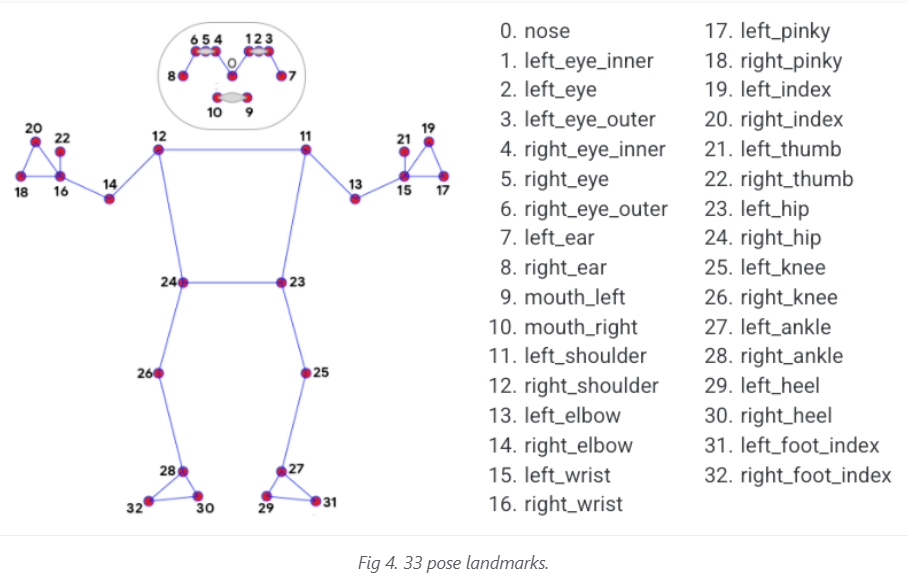

In [4]:
cap = cv2.VideoCapture(0)  # Open default webcam

# Initialize MediaPipe Pose model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()  # Capture frame
        frame =cv2.flip(frame,1)
        # Convert image to RGB for MediaPipe
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Improve performance

        # Run pose detection
        results = pose.process(image)

        # Convert image back to BGR for OpenCV
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Try extracting landmark data
        try:
            landmarks = results.pose_landmarks.landmark  # Get list of 33 pose landmarks
            print(landmarks)  # Print landmark data (x, y, z, visibility) for each joint
        except:
            pass  # In case no landmarks are detected in the frame

        # Draw pose landmarks and connections
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=5, circle_radius=5),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=5, circle_radius=5)
        )

        # Show the frame with pose overlay
        cv2.imshow('Mediapipe Feed', image)

        # Exit when 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Clean up
    cap.release()
    cv2.destroyAllWindows()


[x: 0.400177181
y: 0.973866701
z: -1.25288272
visibility: 0.994429
, x: 0.457148
y: 0.9018929
z: -1.14980209
visibility: 0.994483173
, x: 0.485882342
y: 0.90546
z: -1.15066504
visibility: 0.994910657
, x: 0.515938103
y: 0.911331534
z: -1.15097916
visibility: 0.994070709
, x: 0.368043363
y: 0.895110369
z: -1.14663112
visibility: 0.994385958
, x: 0.336503983
y: 0.894678
z: -1.14637136
visibility: 0.99511683
, x: 0.308307022
y: 0.895684123
z: -1.14718175
visibility: 0.994719863
, x: 0.569742441
y: 0.97847122
z: -0.538972676
visibility: 0.996245086
, x: 0.272954702
y: 0.950363696
z: -0.507289708
visibility: 0.994899571
, x: 0.45053187
y: 1.08126557
z: -1.02185357
visibility: 0.987781644
, x: 0.340549618
y: 1.06962693
z: -1.01733947
visibility: 0.988648593
, x: 0.707282424
y: 1.46374762
z: -0.347307444
visibility: 0.722840548
, x: 0.100177035
y: 1.44496882
z: -0.292089641
visibility: 0.731566
, x: 0.871558189
y: 1.78355384
z: -1.04024
visibility: 0.0554090366
, x: -0.0217641
y: 1.85157669
z

In [12]:
# Prints the total number of landmarks detected (33 for full-body pose)
print(len(landmarks))  

# Loops through all pose landmarks (like LEFT_SHOULDER, RIGHT_KNEE) and prints their enum names
for lndmrk in mp_pose.PoseLandmark:  
    print(lndmrk)  


33
PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


### 3. Calculate Angles

In [6]:
def calculate_angle(a, b, c):
    a = np.array(a)  # Convert point 'a' into a numpy array
    b = np.array(b)  # Convert point 'b' into a numpy array (middle point, vertex of the angle)
    c = np.array(c)  # Convert point 'c' into a numpy array

    # Calculate the angle between points a, b, and c using the arctangent of the slope of the lines
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    
    # Convert radians to degrees
    angle = np.abs(radians * 180.0 / np.pi)
    
    # Ensure the angle is between 0 and 180 degrees
    if angle > 180.0:
        angle = 360 - angle
    
    return angle  # Return the angle


### 4. Shoulder Press Counter

In [18]:
import pygame
import time

# Initialize webcam feed (0 is the default webcam)
cap = cv2.VideoCapture(0)

# Shoulder Press counter and current stage (up/down)
counter = 0 
stage = None

# Initialize Pygame for audio feedback
pygame.init()
#sound = pygame.mixer.Sound("rep_complete.wav")  

# Function to play audio feedback when a rep is completed
def play_feedback():
    sound.play()
    time.sleep(1)  # Prevent repeated audio playback

# Setup Mediapipe Pose instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1)  # Flip horizontally for mirror view

        # Convert frame from BGR to RGB for Mediapipe processing
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Improve performance

        # Run pose estimation
        results = pose.process(image)

        # Convert back to BGR for OpenCV display
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        try:
            # Extract pose landmarks
            landmarks = results.pose_landmarks.landmark

            # Get coordinates of left arm
            shoulder_l = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,
                          landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow_l = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,
                       landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist_l = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,
                       landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

            # Get coordinates of right arm
            shoulder_r = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,
                          landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow_r = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist_r = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,
                       landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]

            # Calculate elbow angles
            angle_l = calculate_angle(shoulder_l, elbow_l, wrist_l)
            angle_r = calculate_angle(shoulder_r, elbow_r, wrist_r)

            # Shoulder Press counter logic
            if angle_l and angle_r > 100: #If both arms are lowered
                stage = "down"
            if angle_l < 20 and angle_r < 20 and stage == 'down':
                stage = "up"
                counter += 1
                play_feedback()
                print(counter)
                
        except:
            pass  # In case landmarks are not detected

        # Draw a box to show rep count and stage
        cv2.rectangle(image, (0, 0), (225, 73), (245, 117, 16), -1)

        # Display reps count
        cv2.putText(image, 'REPS', (15, 12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10, 60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

        # Display current stage (up/down)
        cv2.putText(image, 'STAGE', (65, 12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60, 60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 2, cv2.LINE_AA)

        # OPTIONAL: Draw pose landmarks
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

        # Show the processed video feed
        cv2.imshow('Mediapipe Feed', image)

        # Exit on pressing 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release resources
    cap.release()
    cv2.destroyAllWindows()
